In [4]:
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
import spacy
from spacy.lang.en import English

nlp_sm = spacy.load('en_core_web_sm')
nlp_md = spacy.load('en_core_web_md')

deep_space = pd.read_csv('deep_space.csv')
original = pd.read_csv('original.csv')
enterprise = pd.read_csv('enterprise.csv')
animated = pd.read_csv('animated.csv')
next_gen = pd.read_csv('next_gen.csv')
voyager = pd.read_csv('voyager.csv')

In [5]:
#Original Series
spock_lines = original[original['character'] == 'SPOCK']['lines']
kirk_lines = original[original['character'] == 'KIRK']['lines']

#Voyager
janeway_lines = voyager[voyager['character'] == 'JANEWAY']['lines']
#Enterprise
archer_lines = enterprise[enterprise['character'] == 'ARCHER']['lines']
#Deep Space 9
sisko_lines = deep_space[deep_space['character'] == 'SISKO']['lines']

#Next Generation
picard_lines = next_gen[next_gen['character'] == 'PICARD']['lines']
data_lines = next_gen[next_gen['character'] == 'DATA']['lines']

#Animated Series
spock_lines2 = animated[animated['character'] == 'SPOCK']['lines']
kirk_lines2 = animated[animated['character'] == 'KIRK']['lines']

spock_str = str([line for line in spock_lines])
kirk_str = str([line for line in kirk_lines])
janeway_str = str([line for line in janeway_lines])
archer_str = str([line for line in archer_lines])
sisko_str = str([line for line in sisko_lines])
picard_str = str([line for line in picard_lines])
data_str = str([line for line in data_lines])
spock_str2 = str([line for line in spock_lines2])
kirk_str2 = str([line for line in kirk_lines2])

#Object to Loop Through

line_loop = [("Original Spock", spock_str), ("Original Kirk", kirk_str), 
             ("Janeway", janeway_str), ("Archer", archer_str),
              ("Sisko", sisko_str), ("Picard", picard_str), 
             ("Data", data_str),("Animated Spock", spock_str2), 
              ("Animated Kirk", kirk_str2)]
#Loop for similarity
similarities_list = []

In [6]:
vectors = []
for character, lines in line_loop:
    doc = nlp_md(lines)
    doc_vector = doc.vector
    vectors.append((character, doc_vector))
    print("done")

done
done
done
done
done
done
done
done
done


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
for character, lines in line_loop:
    person1 = character
    lines1 = lines
    print(character)
    for character, lines in line_loop:
        print(person1, character)
        if person1 == character:
            pass
        else:
            similarities_list.append((person1, character, nlp_md(lines1).similarity(nlp_md(lines))))
            print(person1, character, nlp_md(lines1).similarity(nlp_md(lines)))

Original Spock
Original Spock Original Spock
Original Spock Original Kirk


KeyboardInterrupt: 

In [11]:
vector_df = pd.DataFrame(vectors, columns=["character","vector"])
similarity_df = pd.DataFrame(similarities_list, columns=["character1","character2", "similarity"])
similarity_df

,character1,character2,similarity
0,Original Spock,Original Kirk,0.381106
1,Original Spock,Janeway,-0.134451
2,Original Spock,Archer,0.126972
3,Original Spock,Sisko,-0.153085
4,Original Spock,Picard,-0.134451
...,...,...,...
139,Animated Kirk,Archer,0.994706
140,Animated Kirk,Sisko,0.995783
141,Animated Kirk,Picard,0.998034
142,Animated Kirk,Data,0.991881


In [12]:
print(nlp_md(spock_str).similarity(nlp_md(kirk_str)))

0.9937130743555186


In [19]:
similarity_df.tail(75)

,character1,character2,similarity
69,Animated Kirk,Picard,-0.107641
70,Animated Kirk,Data,0.400255
71,Animated Kirk,Animated Spock,0.310815
72,Original Spock,Original Kirk,0.993713
73,Original Spock,Janeway,0.992275
...,...,...,...
139,Animated Kirk,Archer,0.994706
140,Animated Kirk,Sisko,0.995783
141,Animated Kirk,Picard,0.998034
142,Animated Kirk,Data,0.991881


In [22]:
sim_df = similarity_df.drop(similarity_df.index[0:70])
sim_df

,character1,character2,similarity
70,Animated Kirk,Data,0.400255
71,Animated Kirk,Animated Spock,0.310815
72,Original Spock,Original Kirk,0.993713
73,Original Spock,Janeway,0.992275
74,Original Spock,Archer,0.987308
...,...,...,...
139,Animated Kirk,Archer,0.994706
140,Animated Kirk,Sisko,0.995783
141,Animated Kirk,Picard,0.998034
142,Animated Kirk,Data,0.991881


In [24]:
sim_df.drop([70,71], inplace=True)
sim_df

,character1,character2,similarity
72,Original Spock,Original Kirk,0.993713
73,Original Spock,Janeway,0.992275
74,Original Spock,Archer,0.987308
75,Original Spock,Sisko,0.989571
76,Original Spock,Picard,0.995689
...,...,...,...
139,Animated Kirk,Archer,0.994706
140,Animated Kirk,Sisko,0.995783
141,Animated Kirk,Picard,0.998034
142,Animated Kirk,Data,0.991881


In [25]:
sim_df.reset_index(inplace=True)

,index,character1,character2,similarity
0,72,Original Spock,Original Kirk,0.993713
1,73,Original Spock,Janeway,0.992275
2,74,Original Spock,Archer,0.987308
3,75,Original Spock,Sisko,0.989571
4,76,Original Spock,Picard,0.995689
...,...,...,...,...
67,139,Animated Kirk,Archer,0.994706
68,140,Animated Kirk,Sisko,0.995783
69,141,Animated Kirk,Picard,0.998034
70,142,Animated Kirk,Data,0.991881


In [26]:
sim = sim_df.drop("index", axis=1)
sim

,character1,character2,similarity
0,Original Spock,Original Kirk,0.993713
1,Original Spock,Janeway,0.992275
2,Original Spock,Archer,0.987308
3,Original Spock,Sisko,0.989571
4,Original Spock,Picard,0.995689
...,...,...,...
67,Animated Kirk,Archer,0.994706
68,Animated Kirk,Sisko,0.995783
69,Animated Kirk,Picard,0.998034
70,Animated Kirk,Data,0.991881


In [27]:
sim.to_csv('similarities.csv')
vectors

[('Original Spock',
  array([-1.96114758e-02,  1.75926497e-01, -1.46237736e-01, -7.56128151e-02,
          5.50981158e-02,  1.26966140e-02, -6.52995872e-03, -9.44715008e-02,
         -4.56694426e-02,  2.19899790e+00, -1.50989259e-01,  6.07121389e-02,
          1.01101293e-01, -2.89228138e-02, -1.42806224e-01, -8.54055935e-02,
         -6.73199645e-02,  1.12829412e+00, -1.87904858e-01, -2.00731306e-02,
          3.66661921e-03, -3.20021107e-02, -5.11374573e-02, -2.56283384e-02,
          8.40563657e-04,  2.65346901e-02, -8.71941242e-02, -6.40988642e-02,
          7.52274357e-02, -5.48401195e-02, -5.50412585e-02,  5.43876050e-02,
         -5.78182904e-02,  7.60731289e-02,  3.03897420e-02, -5.74389575e-02,
          3.97002363e-02,  6.22994420e-02, -4.81247472e-02, -7.09434414e-02,
         -1.40261587e-02,  3.32802570e-03,  5.22805508e-02, -8.17951352e-02,
          5.84343290e-02,  1.34554359e-02, -1.40999527e-01,  7.10568314e-04,
         -1.27357178e-03,  6.51154190e-03, -4.12749967e-

In [28]:
vec = pd.DataFrame(vectors, columns=['character', 'vector'])
vec

,character,vector
0,Original Spock,"[-0.019611475840336134, 0.17592649684873948, -..."
1,Original Kirk,"[-0.032323832638410474, 0.18556812576286288, -..."
2,Janeway,"[-0.013419359539309672, 0.17301200640996586, -..."
3,Archer,"[-0.012017589869506292, 0.1742844104058321, -0..."
4,Sisko,"[-0.012329580809935835, 0.17667354482586575, -..."
5,Picard,"[-0.019463772496316506, 0.1720563974092631, -0..."
6,Data,"[-0.01439641736752661, 0.16584148053974915, -0..."
7,Animated Spock,"[-0.015522295, 0.1660336, -0.14411043, -0.0751..."
8,Animated Kirk,"[-0.030487802, 0.1773447, -0.1521065, -0.08673..."


In [29]:
vec.to_csv('vectors.csv')

830305
[('nan', 67895), ('know', 3861), ('one', 3013), ('going', 2687), ('get', 2541), ('would', 2434), ('want', 2420), ('right', 2419), ('like', 2397), ('think', 2206), ('well', 2157), ('u', 2103), ('time', 2094), ('see', 1998), ('could', 1875), ('go', 1844), ('way', 1569), ('let', 1547), ('take', 1508), ('good', 1496), ('come', 1420), ('back', 1401), ('make', 1358), ('say', 1340), ('tell', 1322), ('need', 1273), ('ca', 1257), ('thing', 1233), ('yes', 1206), ('look', 1204), ('never', 1201), ('something', 1199), ('oh', 1198), ('ship', 1183), ('two', 1181), ('sure', 1063), ('got', 1036), ('people', 1005), ('station', 1003), ('doctor', 997), ('captain', 966), ('sir', 960), ('mean', 959), ('find', 958), ('commander', 951), ('day', 931), ('maybe', 894), ('odo', 881), ('much', 870), ('really', 866)]
370239
[('nan', 20627), ('captain', 3931), ('mister', 2271), ('spock', 2047), ('sir', 1806), ('one', 1445), ('u', 1372), ('know', 1214), ('yes', 1179), ('doctor', 1136), ('would', 1061), ('ship'

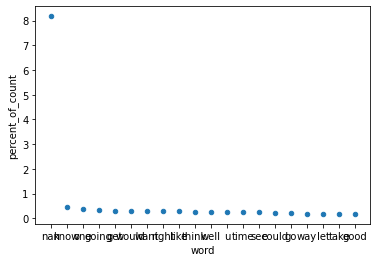

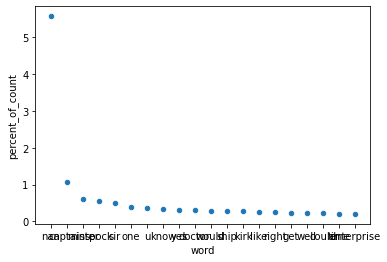

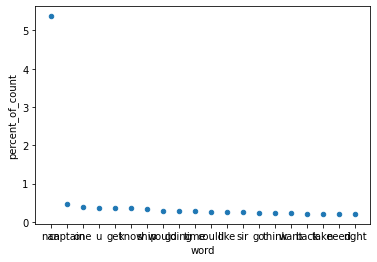

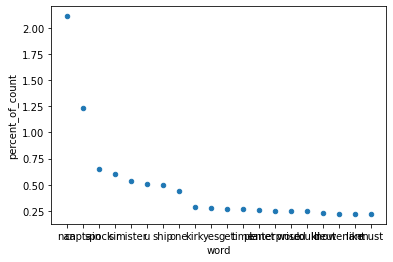

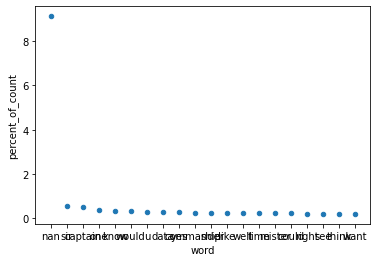

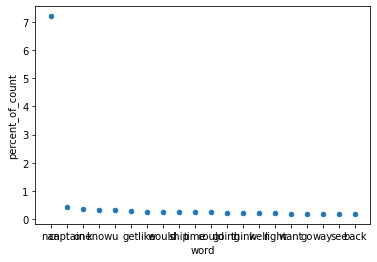

In [31]:
deep_space_lines = deep_space['lines']
original_lines = original['lines']
enterprise_lines = enterprise['lines']
animated_lines = animated['lines']
next_gen_lines = next_gen['lines']
voyager_lines = voyager['lines']
lines_list = [deep_space_lines, original_lines, enterprise_lines, animated_lines, next_gen_lines, voyager_lines]
most_common_count = []
for x in lines_list:
    concat = str([line for line in x])
    tokens = word_tokenize(concat)
    lower_tokens = [t.lower() for t in tokens]
    alpha_only = [t for t in lower_tokens if t.isalpha()]
    wordc = len(alpha_only)
    print(wordc)
    no_stops = [t for t in alpha_only if t not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(t) for t in no_stops]
    counter = Counter(lemmatized)
    most_common = counter.most_common()
    series_tuple = (most_common, wordc)
    most_common_count.append(series_tuple)
    print(most_common[0:50])
for x in most_common_count:
    series_words = pd.DataFrame(x[0], columns=['word', 'number']) 
    series_words['percent_of_count'] = (series_words['number']/x[1]) * 100
    print(series_words.head(10))
    series_words[:20].plot.scatter(x='word',y='percent_of_count')

In [55]:
char_common_count = []
for character, lines in line_loop:
    print(character, type(lines))
    tokens = word_tokenize(lines)
    lower_tokens = [t.lower() for t in tokens]
    alpha_only = [t for t in lower_tokens if t.isalpha()]
    wordc = len(alpha_only)
    print(wordc)
    no_stops = [t for t in alpha_only if t not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(t) for t in no_stops]
    counter = Counter(lemmatized)
    most_common = counter.most_common()
    series_tuple = (most_common, wordc, character)
    char_common_count.append(series_tuple)
    print(character, most_common[0:50])

Original Spock <class 'str'>
59743
Original Spock [('captain', 1392), ('doctor', 416), ('would', 291), ('mister', 288), ('one', 284), ('u', 185), ('ship', 165), ('planet', 162), ('must', 156), ('time', 153), ('yes', 149), ('power', 147), ('spock', 139), ('sir', 138), ('may', 135), ('could', 133), ('scott', 129), ('life', 125), ('know', 125), ('enterprise', 115), ('two', 111), ('course', 100), ('quite', 96), ('sensor', 94), ('believe', 91), ('reading', 87), ('computer', 87), ('human', 86), ('shall', 83), ('three', 79), ('kirk', 79), ('find', 75), ('make', 75), ('see', 75), ('point', 74), ('please', 74), ('four', 73), ('fascinating', 73), ('year', 72), ('seven', 72), ('correct', 72), ('well', 71), ('vulcan', 71), ('lieutenant', 71), ('back', 71), ('logical', 70), ('mccoy', 69), ('mind', 68), ('beam', 68), ('hundred', 67)]
Original Kirk <class 'str'>
103614
Original Kirk [('mister', 1245), ('spock', 1108), ('kirk', 483), ('u', 474), ('get', 410), ('ship', 401), ('yes', 398), ('one', 380),

In [56]:
spock_words1 = pd.DataFrame(char_common_count[0][0], columns=['word', 'number'])
spock_words1['percent_of_count'] = (spock_words1['number']/char_common_count[0][1]) * 100

kirk_words1 = pd.DataFrame(char_common_count[1][0], columns=['word', 'number'])
kirk_words1['percent_of_count'] = (kirk_words1['number']/char_common_count[1][1]) * 100

janeway_words = pd.DataFrame(char_common_count[2][0], columns=['word', 'number'])
janeway_words['percent_of_count'] = (janeway_words['number']/char_common_count[2][1]) * 100

archer_words = pd.DataFrame(char_common_count[3][0], columns=['word', 'number'])
archer_words['percent_of_count'] = (archer_words['number']/char_common_count[3][1]) * 100

sisko_words = pd.DataFrame(char_common_count[4][0], columns=['word', 'number'])
sisko_words['percent_of_count'] = (sisko_words['number']/char_common_count[4][1]) * 100

picard_words = pd.DataFrame(char_common_count[5][0], columns=['word', 'number'])
picard_words['percent_of_count'] = (picard_words['number']/char_common_count[5][1]) * 100

data_words = pd.DataFrame(char_common_count[6][0], columns=['word', 'number'])
data_words['percent_of_count'] = (data_words['number']/char_common_count[6][1]) * 100

spock_words2 = pd.DataFrame(char_common_count[7][0], columns=['word', 'number'])
spock_words2['percent_of_count'] = (spock_words2['number']/char_common_count[7][1]) * 100

kirk_words2 = pd.DataFrame(char_common_count[8][0], columns=['word', 'number'])
kirk_words2['percent_of_count'] = (kirk_words2['number']/char_common_count[8][1]) * 100

In [57]:
spock_words1

,word,number,percent_of_count
0,captain,1392,2.329980
1,doctor,416,0.696316
2,would,291,0.487086
3,mister,288,0.482065
4,one,284,0.475369
...,...,...,...
5492,disappointed,1,0.001674
5493,believable,1,0.001674
5494,withdraw,1,0.001674
5495,ruthlessly,1,0.001674


In [65]:
#[deep_space_lines, original_lines, enterprise_lines, animated_lines, next_gen_lines, voyager_lines]
deep_space_words = pd.DataFrame(most_common_count[0][0], columns=['word', 'number'])
deep_space_words['percent_of_count'] = (deep_space_words['number']/most_common_count[0][1]) * 100

original_words = pd.DataFrame(most_common_count[1][0], columns=['word', 'number'])
original_words['percent_of_count'] = (original_words['number']/most_common_count[1][1]) * 100

enterprise_words = pd.DataFrame(most_common_count[2][0], columns=['word', 'number'])
enterprise_words['percent_of_count'] = (enterprise_words['number']/most_common_count[2][1]) * 100

animated_words = pd.DataFrame(most_common_count[3][0], columns=['word', 'number'])
animated_words['percent_of_count'] = (animated_words['number']/most_common_count[3][1]) * 100

next_gen_words = pd.DataFrame(most_common_count[4][0], columns=['word', 'number'])
next_gen_words['percent_of_count'] = (next_gen_words['number']/most_common_count[4][1]) * 100

voyager_words = pd.DataFrame(most_common_count[5][0], columns=['word', 'number'])
voyager_words['percent_of_count'] = (voyager_words['number']/most_common_count[5][1]) * 100

                  word  number  percent_of_count
0                  nan   67895          8.177116
1                 know    3861          0.465010
2                  one    3013          0.362879
3                going    2687          0.323616
4                  get    2541          0.306032
...                ...     ...               ...
35069        butbehind       1          0.000120
35070         trialhas       1          0.000120
35071       malcontent       1          0.000120
35072  apprehendedwith       1          0.000120
35073    freecardassia       1          0.000120

[35074 rows x 3 columns]               word  number  percent_of_count
0              nan   20627          5.571266
1          captain    3931          1.061747
2           mister    2271          0.613388
3            spock    2047          0.552886
4              sir    1806          0.487793
...            ...     ...               ...
11115       bathed       1          0.000270
11116       craved       1

In [66]:
deep_space_words.drop([0], inplace=True)
deep_space_words.reset_index(inplace=True)

,index,word,number,percent_of_count
0,1,know,3861,0.465010
1,2,one,3013,0.362879
2,3,going,2687,0.323616
3,4,get,2541,0.306032
4,5,would,2434,0.293145
...,...,...,...,...
35068,35069,butbehind,1,0.000120
35069,35070,trialhas,1,0.000120
35070,35071,malcontent,1,0.000120
35071,35072,apprehendedwith,1,0.000120


In [67]:
deep_space_words.drop(['index'], axis=1, inplace=True)
deep_space_words

,word,number,percent_of_count
0,know,3861,0.465010
1,one,3013,0.362879
2,going,2687,0.323616
3,get,2541,0.306032
4,would,2434,0.293145
...,...,...,...
35068,butbehind,1,0.000120
35069,trialhas,1,0.000120
35070,malcontent,1,0.000120
35071,apprehendedwith,1,0.000120


In [68]:
#[deep_space_lines, original_lines, enterprise_lines, animated_lines, next_gen_lines, voyager_lines]
original_words.drop([0], inplace=True)
original_words.reset_index(inplace=True)
original_words.drop(['index'], axis=1, inplace=True)

enterprise_words.drop([0], inplace=True)
enterprise_words.reset_index(inplace=True)
enterprise_words.drop(['index'], axis=1, inplace=True)

animated_words.drop([0], inplace=True)
animated_words.reset_index(inplace=True)
animated_words.drop(['index'], axis=1, inplace=True)

next_gen_words.drop([0], inplace=True)
next_gen_words.reset_index(inplace=True)
next_gen_words.drop(['index'], axis=1, inplace=True)

voyager_words.drop([0], inplace=True)
voyager_words.reset_index(inplace=True)
voyager_words.drop(['index'], axis=1, inplace=True)

In [74]:
voyager_words = voyager_words[voyager_words.word != "u"]
original_words = original_words[original_words.word != "u"]
enterprise_words = enterprise_words[enterprise_words.word != "u"]
animated_words = animated_words[animated_words.word != "u"]
next_gen_words = next_gen_words[next_gen_words.word != "u"]
deep_space_words = deep_space_words[deep_space_words.word != "u"]

spock_words1 = spock_words1[spock_words1.word != "u"]
kirk_words1 = kirk_words1[kirk_words1.word != "u"]
janeway_words = janeway_words[janeway_words.word != "u"]
archer_words = archer_words[archer_words.word != "u"]
sisko_words = sisko_words[sisko_words.word != "u"]
picard_words = picard_words[picard_words.word != "u"]
data_words = data_words[data_words.word != "u"]
spock_words2 = spock_words2[spock_words2.word != "u"]
kirk_words2 = kirk_words2[kirk_words2.word != "u"]

In [75]:
deep_space_words.to_csv('deep_space_words.csv')
original_words.to_csv('original_words.csv')
enterprise_words.to_csv('enterprise_words.csv')
animated_words.to_csv('animated_words.csv')
next_gen_words.to_csv('next_gen_words.csv')
voyager_words.to_csv('voyager_words.csv')

In [76]:
spock_words1.to_csv('spock_words1.csv')
kirk_words1.to_csv('kirk_words1.csv')
janeway_words.to_csv('janeway_words.csv')
archer_words.to_csv('archer_words.csv')
sisko_words.to_csv('sisko_words.csv')
picard_words.to_csv('picard_words.csv')
data_words.to_csv('data_words.csv')
spock_words2.to_csv('spock_words2.csv')
kirk_words2.to_csv('kirk_words2.csv')